In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [2]:
A = [2600,550000]
B = [3000,565000]
C = [3200,610000]
D = [3600,680000]
E = [4000,725000]

In [3]:
df = pd.DataFrame((A,B,C,D,E),[0,1,2,3,4],['area','price'])
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


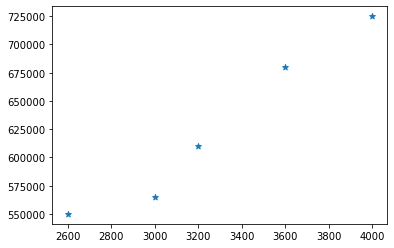

In [4]:
plt.scatter(df['area'],df['price'],marker="*")

In [63]:
theta = np.polyfit(df.area,df.price,1)
theta

array([1.35787671e+02, 1.80616438e+05])

In [6]:
y_line = theta[1]+theta[0]*df['area']

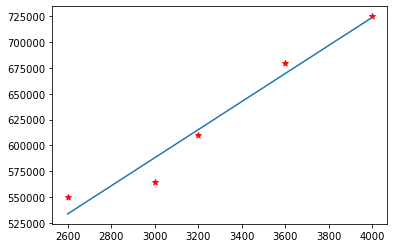

In [9]:
plt.scatter(df['area'],df['price'],marker="*",color="r")
plt.plot(df['area'],y_line)
#plt.show()

In [15]:
data = pd.read_csv("sample.csv")
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


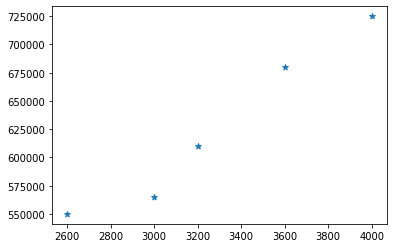

In [12]:
plt.scatter(data['area'],data['price'],marker="*")

In [13]:
theta = np.polyfit(data['area'],data['price'],1)
theta

array([1.35787671e+02, 1.80616438e+05])

In [14]:
y_line = theta[1]+theta[0]*data['area']
y_line

0    533664.383562
1    587979.452055
2    615136.986301
3    669452.054795
4    723767.123288
Name: area, dtype: float64

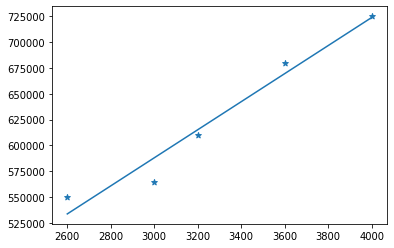

In [15]:
plt.scatter(data['area'],data['price'],marker="*")
plt.plot(data['area'],y_line)

In [68]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])

LinearRegression()

In [22]:
reg1 = linear_model.LinearRegression()
reg1.fit(data[['area']],data.price)

LinearRegression()

In [69]:
reg.predict([[3300]])

/home/deepak/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [27]:
reg1.predict([[3300]])

/home/deepak/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
# y= mx + c
"""here x is area and y is price so,

price = area*m +c 

m is slope/gradient/ coefficient
c is y-intercept



"""

In [28]:
reg.coef_

array([135.78767123])

In [29]:
reg.intercept_

180616.43835616432

In [30]:
reg.predict([[5000]])

/home/deepak/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [50]:
df1 = pd.read_csv("area_predict.csv")
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [51]:
value = [1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]

In [52]:
data1 = pd.DataFrame((value),[0,1,2,3,4,5,6,7,8,9,10,11,12],['area'])
data1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [53]:
reg.predict(df1) #just stored the all the desired predictions to be made in a single go

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [54]:
reg1.predict(data1)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
#### Now We neeed to save this data and return to the user in good way, lets use csv file

In [55]:
df1['price'] = reg.predict(df1) #it created a new coloumn with name prices in data frame.
df1

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [56]:
# issue is that changes are not reflected to csv file as of now, changes are only limited to this notebook.

In [ ]:
# but df1 here conatins all values, let's export this

In [57]:
df1.to_csv('area_predict.csv')

In [58]:
#it imports index as well, if we wish to abstain from index then can use
#df1.to_csv("area_predict.csv",index=False)

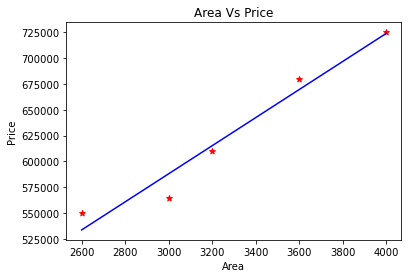

In [62]:
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area Vs Price")
plt.scatter(data['area'],data['price'],marker="*",color="r")
plt.plot(data['area'],reg.predict(data[['area']]),color="b")

# bye bye to np.ployfit(x,y,degree) with this